# Classification of trapped particles
Using forward scattering information

In [2]:
import numpy as np
import os
from scipy import *
import pandas as pd
from matplotlib.pyplot import *
#* is used to import all from that library 

# Load the time domain data 

In [36]:
#path to the folder where data is stored
#to find all the files required 
folder_path = "C://Users//nequi//Documents//Nuno-Junho//"

#list the paths ending in .TDdat
#to use only the files .TDdat, for files in that directory that end with .TDdat, where f are the files.TDdat
path_files_TD = [folder_path+f for f in os.listdir(folder_path) if f.endswith('.TDdat')]

#store the info for each file
target = [] #type of target
x_data = [] #xdata
y_data = [] #ydata
t_data = [] #time data
sum_data = [] #intensity data

#number of splits
#the total data for each target is divided in 20moments, to increse the data treatment
splits = 20

#read data
#for each .TDdat file
for i in range(0,len(path_files_TD)):

    #for a given path, all directory for each file will be printed
    current_path = path_files_TD[i]
    print(current_path)
    
    #each file will be divided in 20 moments, which will be appended as targets     
    #read type
    for i in range(0,splits):
        #for each file in path_files_TD, it will save 20 equal targets
        target.append(current_path.split('//')[5].split('.')[0]) #3umPMMA
        #each part is stored in each 3umPMMA file (20x)

    #load data-read csv file
    #skiprows=5 to skip the text in .TDdat file 
    #delimiter=' ' space between each column 
    current_df = pd.read_csv(current_path,skiprows=5,header=None,delimiter=' ')
    #current_df contains the four columns of the file, which correspond to 
    #[0]-time, [1]-xdata, [2]-ydata, [3]-sum
    #np.array split (split an array into multiple sub-arrays of equal or near-equal size)
    t_data.append(np.array_split(np.array(current_df[0]),splits)) 
    x_data.append(np.array_split(np.array(current_df[1]),splits))
    y_data.append(np.array_split(np.array(current_df[2]),splits))
    sum_data.append(np.array_split(np.array(current_df[3]),splits))
    #tdata, divide first column in 20 sub-arrays (...)
#print(len(t_data[5]))
#print(len(t_data[0][0]))
#print(len(t_data[0][19]))

C://Users//nequi//Documents//Nuno-Junho//3umPMMA.TDdat
C://Users//nequi//Documents//Nuno-Junho//3umPOLY.TDdat
C://Users//nequi//Documents//Nuno-Junho//4UMpoly.TDdat
C://Users//nequi//Documents//Nuno-Junho//8umPMMA.TDdat
C://Users//nequi//Documents//Nuno-Junho//8umPOLY.TDdat
C://Users//nequi//Documents//Nuno-Junho//water.TDdat


## Plot acquired data

<IPython.core.display.Javascript object>


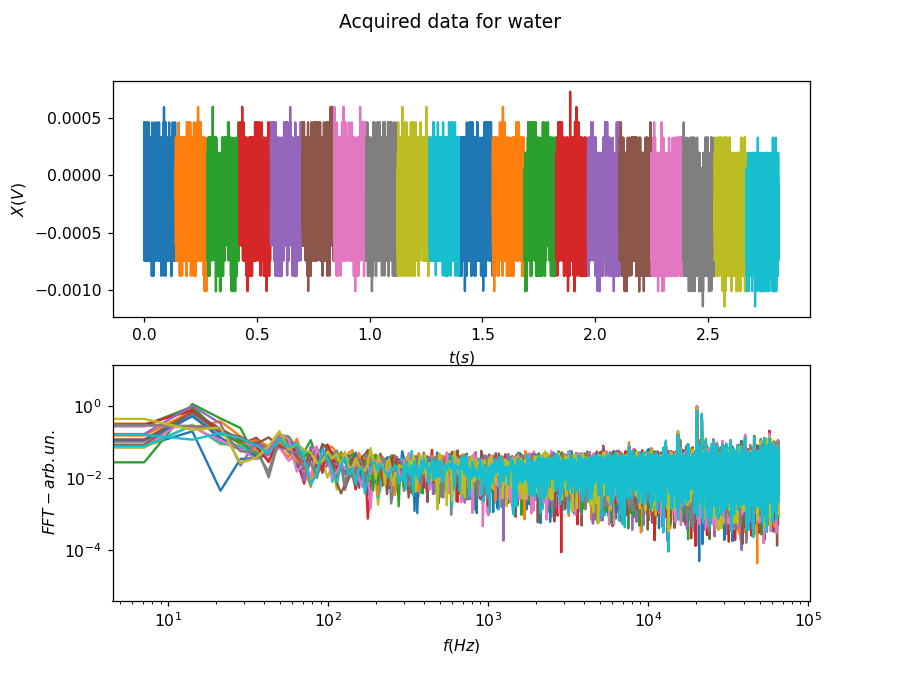

The sampling spacing is given by 7.629393999675216e-06
The sampling rate chosen is 131072.0091323859 Hz
18432
18432
6
6
120


In [48]:
%matplotlib notebook
#import matplotlib.pyplot as plt

#In suptitle the name is defined by target which varies from 0 to 19 for each type file. And so, index 1 is defined for 
#3umPMMA from 0 to 19, and so, to be adjusted to each file in t_data which varies from t_data[0] to t_data[5], and so 
#it must be divided  by number of slipts, so that from 0 to 19, the int(index1/splits) is related to file 0, 3umPMMA
#index1 varies from 0 to 119

index1 = 119
#graph aspect and respective axis labels
figure(figsize=[8,6])
subplot(211)
ax1=gca() #to get the axis
#axis labels
ax1.set_xlabel("$t (s)$")
ax1.set_ylabel("$X (V)$")
subplot(212)
ax2=gca() #to get the axis
#axis labels
ax2.set_xlabel("$f (Hz)$")
ax2.set_ylabel("$FFT - arb.un.$")
#log scale
ax2.set_yscale('log')
ax2.set_xscale('log')

#print(len(x_data[0]))
#print(len(t_data[0]))
#int(index1/splits)-> varies form 0 to 5, which represents the different 6 files.

#clearly the 20 splits of data are visible in the plot, in different colors (for each file)
for chunk in range(0, splits):
    #index1-0 to 20 is 3umPMMA
    #index1-20 to 40 is 3umPOLY (...)
    suptitle("Acquired data for " + target[index1]) #title name
    #plot the time data and the x data for each chunk, since print(len(t_data[0])) is 20, that is the array
    #is divided in 20 parts approx. equal for each file 
    ax1.plot(t_data[int(index1/splits)][chunk],x_data[int(index1/splits)][chunk],label="Split"+str(chunk))
    #label="Split"+str(chunk) represents each slip (for the same original signal) with different colors
    #slipts goes from 0 to 20 and that can be half visible with plt.legend()
    
    #To perform FFT, in this specific case for [index1][allchuncks]
    #(x_data not x axis !!)
    data_to_fft = x_data[int(index1/splits)][chunk]
    #np.fft.fft ->one-dimensional discrete Fourier Transform(DFT)
    #fft_data represents the y axis
    fft_data = np.fft.fft(data_to_fft) 
    
    #Depending on the sampling rate (taxa amostragem), the x axis is ploted differently
    #dt represents the sample spacing, that is, the inverse of the sampling rate
    #the difference between the previous point with the next point gives the sample spacing 
    dt = t_data[int(index1/splits)][chunk][2]-t_data[int(index1/splits)][chunk][1]
    
    #fft.fftfreq ->Frequency bins for given FFT parameters
    #frequency bins ->intervals between samples in frequency domain
    #freqs = np.fft.fftfreq(window length,sample spacing) => array containing the sample frequencies
    freqs = np.fft.fftfreq(len(data_to_fft),dt)
    
    #np.fft.fftshift ->Shift the zero-frequency component to the center of the spectrum.
    #fft and the corresponding frequencies are centered and then the plot only considers the abs of fft_data
    fft_data = np.fft.fftshift(fft_data) 
    freqs = np.fft.fftshift(freqs)
    plot(freqs,abs(fft_data) ,label="Split "+str(chunk))
#plt.legend(fontsize=6)
#print(int(index1/splits))

print("The sampling spacing is given by",dt)
print("The sampling rate chosen is",1/dt, 'Hz')
print(len(x_data[0][0]))
print(len(t_data[0][0]))
print(len(x_data))
print(len(t_data))
print(len(target))

# Classify data
Prepare the data, based on the FFT of each chunk

In [4]:
data_to_classify = []
data_to_classify2 = []
data_to_classify3 = []
#for all six files (3umPOLY,3umPMMA...water)
for i in range(0,len(x_data)):
    #till the 20 chunks in x_data[0]->x_data[20]
    for j in range(0,len(x_data[i])):
        #the values for each chunck for each file are appended, from x, y and sum data
        data_to_classify.append(np.abs(np.fft.fft(x_data[i][j])))
        data_to_classify2.append(np.abs(np.fft.fft(y_data[i][j])))
        data_to_classify3.append(np.abs(np.fft.fft(sum_data[i][j])))
print("The total number of files is",len(x_data))
print("The total number of chuncks per file is", len(x_data[i]))
        
data_to_classify=np.array(data_to_classify)
data_to_classify2=np.array(data_to_classify2)
data_to_classify3=np.array(data_to_classify3)

#To allow the algorithm to classify the data according to their label
dummy_labels = []
labels = []
#np.unique ->Find the unique elements of an array.
unique_targets = np.unique(target)
for i in range(0,len(target)):
    arr = np.zeros(len(unique_targets))
    labels.append(np.where(target[i]==unique_targets)[0][0])
    index = np.where(target[i]==unique_targets)[0][0]
    arr[index] = 1 
    dummy_labels.append(arr)

labels=np.array(labels)
dummy_labels = np.array(dummy_labels)
print(labels)
#print(dummy_labels)
#

The total number of files is 6
The total number of chuncks per file is 20
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5]


## PCA Analysis
Decompose the data based on principal components, and represent only the Principal component analysis of data_to_classify, corresponding to the x_data

<IPython.core.display.Javascript object>


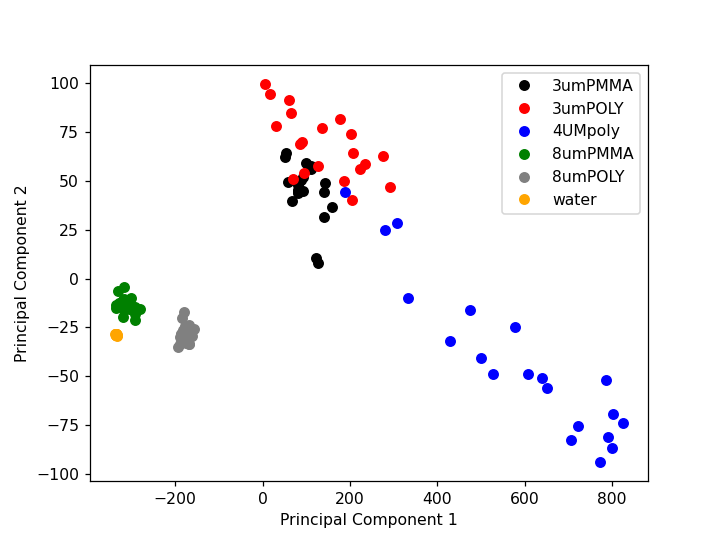

In [5]:
from sklearn import *
#PCA -> To reduce the dimensionality in the variable space

#Three PCAs components, PC1, PC2 and PC3 
ncomp=3

model = decomposition.PCA(n_components=ncomp)
model.fit(data_to_classify)
PCs1 = model.transform(data_to_classify)

model.fit(data_to_classify2)
PCs2 = model.transform(data_to_classify2)

model.fit(data_to_classify3)
PCs3 = model.transform(data_to_classify3)


subplots()
label0=unique_targets[0]
label1=unique_targets[1]
label2=unique_targets[2]
label3=unique_targets[3]
label4=unique_targets[4]
label5=unique_targets[5]

i0= np.where(labels==0)[0]
i1= np.where(labels==1)[0]
i2= np.where(labels==2)[0]
i3= np.where(labels==3)[0]
i4= np.where(labels==4)[0]
i5= np.where(labels==5)[0]

pc1 = 0
pc2 = 1
c=['k','r','b','g','gray','orange']


plot(PCs1[i0,pc1],PCs1[i0,pc2],'o',color=c[0],label=label0)
plot(PCs1[i1,pc1],PCs1[i1,pc2],'o',color=c[1],label=label1)
plot(PCs1[i2,pc1],PCs1[i2,pc2],'o',color=c[2],label=label2)
plot(PCs1[i3,pc1],PCs1[i3,pc2],'o',color=c[3],label=label3)
plot(PCs1[i4,pc1],PCs1[i4,pc2],'o',color=c[4],label=label4)
plot(PCs1[i5,pc1],PCs1[i5,pc2],'o',color=c[5],label=label5)
xlabel("Principal Component 1")
ylabel('Principal Component 2')
legend()

# Classifier based on PCA

In [7]:
from sklearn import *
ts=0.2 #test size (20%used for test ???the algorithm)
#can be any number, however this way we garantee our method starts always in the same "point"
rs=3   #random size(seed)

#Concatenate the analysis of x_data, y_data, and sum_data
PCs = np.concatenate([PCs1,PCs2,PCs3],axis=1)

X_train, X_test, y_train, y_test = model_selection.train_test_split(PCs, labels, test_size=ts, random_state=rs)

#model = cross_decomposition.PLSRegression().fit(X=data_to_classify,Y=dummy_labels)
#model = discriminant_analysis.LinearDiscriminantAnalysis()
#model = linear_model.LogisticRegression()
#model = svm.SVC()
model = ensemble.RandomForestClassifier(n_estimators=60)
#model=neural_network.MLPClassifier()

model.fit(X_train,y_train)

print('Score test')
print(model.score(X_test,y_test))

Score test
1.0


# Scoring the model

Model Accuracy -> 0.9958333333333333


<IPython.core.display.Javascript object>


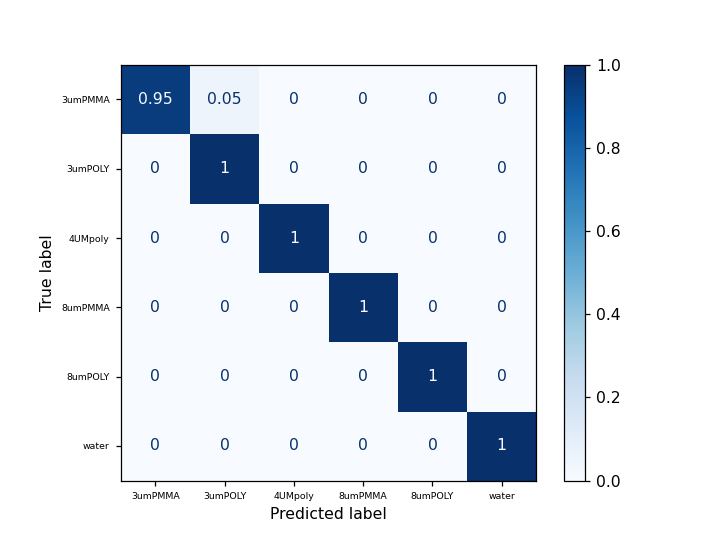

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '3umPMMA'),
  Text(1, 0, '3umPOLY'),
  Text(2, 0, '4UMpoly'),
  Text(3, 0, '8umPMMA'),
  Text(4, 0, '8umPOLY'),
  Text(5, 0, 'water')])

In [8]:
#Crossvalidation score
ts=0.2
rs=0
nfolds=30

cv = model_selection.ShuffleSplit(n_splits=nfolds, test_size=ts, random_state=rs)
scores = model_selection.cross_val_score(model, PCs, labels, cv=cv)
print("Model Accuracy -> " + str(np.mean(scores)))

#Generate a confusion matrix
labels_pred = model_selection.cross_val_predict(model, PCs, labels, cv=5)
conf_mat = metrics.confusion_matrix(labels, labels_pred,normalize="true")
metrics.ConfusionMatrixDisplay(conf_mat,display_labels=unique_targets).plot(cmap=cm.Blues)
yticks(fontsize=6)
xticks(fontsize=6)